In [2]:
# import zipfile
# zip_ref = zipfile.ZipFile("../BioImLab_SingleChromosomes.zip", 'r')
# zip_ref.extractall("../")
# zip_ref.close()

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape,Input
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import SGD,Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras import backend as K
import os
from skimage import io,color,data
from skimage.transform import resize
import matplotlib.pyplot as plt
# K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [3]:
# folder ="../single_chromosomes/38"
# images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
# for j in images:
#     img = data.imread(os.path.join(folder, j),as_gray=True)
#     rows,cols=img.shape
#     borderrow=int(round(rows/4))
#     bordercol=int(round(cols/4))
#     dst1=img[borderrow:rows-borderrow,bordercol:cols-bordercol]
#     plt.subplot(121),plt.imshow(img,'gray'),plt.title('ORIGINAL')
#     plt.subplot(122),plt.imshow(dst1,'gray'),plt.title('Cropped')
#     plt.show()

In [2]:
import h5py
from sklearn.model_selection import train_test_split
image_path = "../karyotype_segment"     # images
y=[]
x = []
for _, dirnames, filenames in os.walk("../karyotype_segment"):
  # ^ this idiom means "we won't be using this value"
    for d in dirnames:
        folder = image_path + "/" + d
        if os.path.isdir(folder):
            images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
            for j in images:
                img = data.imread(os.path.join(folder, j),as_gray=True)
                rows,cols=img.shape
                try:
                    img = resize(img,(128,128,3))
                except BaseException:
                    print(os.path.join(folder, j))
#                 img2=np.fliplr(img)
                x.append(img)
#                 x.append(img2)
                y.append(int(j[:-5])-1)
#                 y.append(int(j[:-5])-1)
print(type(y),len(y))
x = np.array(x)
y=np.array(y)
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

<class 'list'> 4732


In [3]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
print(x_train.shape,x_train[0].shape,type(x_train[0]))

(2366, 128, 128, 3) (128, 128, 3) <class 'numpy.ndarray'>


In [17]:
# for i in range(5):
#     plt.subplot(111),plt.imshow(x_train[i])
#     plt.show()

In [ ]:
# model = Sequential()
# # Conv layer 1 output shape (64, 120, 120)
# model.add(Convolution2D(
#     batch_input_shape=(None, 1, 120, 120),
#     filters=64,
#     kernel_size=5,
#     strides=1,
#     padding='same',     # Padding method
#     data_format='channels_first',
# ))
# model.add(Convolution2D(
#     batch_input_shape=(None, 1, 120, 120),
#     filters=64,
#     kernel_size=5,
#     strides=1,
#     padding='same',     # Padding method
#     data_format='channels_first',
# ))
# model.add(Activation('relu'))
# # Pooling layer 1 (max pooling) output shape (64, 60, 60)
# model.add(MaxPooling2D(
#     pool_size=2,
#     strides=2,
#     padding='same',    # Padding method
#     data_format='channels_first',
# ))

# # Conv layer 2 output shape (32, 60, 60)
# model.add(Convolution2D(32, 5, strides=1, padding='same', data_format='channels_first'))
# model.add(Convolution2D(32, 5, strides=1, padding='same', data_format='channels_first'))
# model.add(Activation('relu'))

# # Pooling layer 2 (max pooling) output shape (32, 30, 30)
# model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# # Conv layer 3 output shape (16, 30, 30)
# model.add(Convolution2D(16, 5, strides=1, padding='same', data_format='channels_first'))
# model.add(Convolution2D(16, 5, strides=1, padding='same', data_format='channels_first'))
# model.add(Activation('relu'))
# # Pooling layer 3 (max pooling) output shape (16, 15, 15)
# model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# # Conv layer 4 output shape (8, 15, 15)
# model.add(Convolution2D(8, 5, strides=1, padding='same', data_format='channels_first'))
# model.add(Convolution2D(8, 5, strides=1, padding='same', data_format='channels_first'))
# model.add(Activation('relu'))
# # Pooling layer 4 (max pooling)
# model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# # Fully connected layer 1 input shape (8 * 7 * 7), output shape (1024)
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation('sigmoid'))

# # Fully connected layer 2 input shape (1024), output shape (512)
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('sigmoid'))

# # Fully connected layer 3 to shape (25) for 25 classes
# model.add(Dense(23))
# model.add(Activation('softmax'))

# # Another way to define your optimizer
# adam = Adam(lr=1e-4)  
# model.compile(optimizer=adam,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#  model.summary()

In [ ]:
history=model.fit(x_train, y_train,batch_size=32,epochs=12,validation_split=0.1)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from keras.models import Model
base_model=DenseNet201(weights= None, include_top=False, input_shape= (128,128,3))
x = base_model.output
x=Flatten()(x)
predictions = Dense(23, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
adam=Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
history=model.fit(x_train, y_train,batch_size=16,epochs=5,validation_split=0.1)

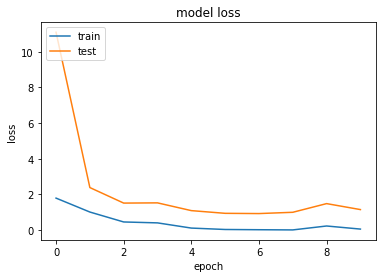

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [8]:
testfolder="../karyotype_segment/36424N"
testx=[]
testy=[]
images = [f for f in os.listdir(testfolder) if os.path.isfile(os.path.join(testfolder, f))]
for j in images:
    img = io.imread(os.path.join(testfolder, j))
#     img_gray=color.rgb2gray(img)
#     print(img.shape)
    img = resize(img,(128,128,3))
 #         img=np.transpose(img,(2,0,1))
    testx.append(img)
    testy.append(int(j[:-5])-1)
testx = np.array(testx)
testy=np.array(testy)
error=[]
predictions = [np.argmax(i) for i in model.predict(testx)]
print(predictions)
for i in range(0,46):
    if predictions[i]!=testy[i]:
        error.append(testy[i])
print(error)

[12, 21, 13, 22, 4, 15, 21, 16, 12, 13, 0, 11, 7, 8, 18, 8, 3, 3, 9, 6, 9, 14, 19, 15, 16, 2, 18, 10, 7, 10, 17, 6, 20, 14, 20, 11, 5, 1, 5, 22, 4, 19, 2, 1, 0, 17]
[]
